1. There is a moderate correlation between a mouse's weight and tumor volume.
2. The box plot shows that there is no statistically significant difference between Capomulin and Ceftamine,
nor between Ramicane and Infubinol.
3. Ramicane is interesting in that it is one of the least effective drugs in terms of reducing tumor
size, but the mice remained in the study long enough to record the second-highest number of timepoints.

_NOTE_: each markdown cell contains bullet points directly copied and pasted from the readme. Most comments from the starter notebook are also included.


Before beginning the analysis, check the data for any mouse ID with duplicate time points and remove any data associated with that mouse ID.

In [1]:
# initial imports, definitions, data, and options.
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

mouse_metadata_path = 'data/Mouse_metadata.csv'
study_results_path = 'data/Study_results.csv'

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results)

# region

# make pandas display more of the output in my code editor
# region
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# endregion

# function to make data easier to work with
def spaceless_lowers(dataframe):
    """
    :param dataframe: a dataframe with columns that have spaces and uppercase letters
    :return: a dataframe with the spaces replaced with _ and all caps made lowercase.
    """
    try:
        cols = dataframe.columns
        cols = [col.replace(' ', '_').lower() for col in cols]
        dataframe.columns = cols

        return dataframe

    except NameError:
        print('There is an unresolved reference to the dataframe in the function\'s argument.\n'
              'Make sure that the dataframe has been read and defined.')


# save original col names in case i need to revert them
mouse_cols_original = mouse_metadata.columns
study_cols_original = study_results.columns
combined_cols_original = combined_df.columns

df_list = [mouse_metadata, study_results, combined_df]

# call the fcn on all 3 dfs
for df in df_list:
    df = spaceless_lowers(df)

# ints are far more efficient and easier to work with than strings
combined_df.sex.replace(
        {
                'Female': 0,
                'Male': 1
        },
        inplace=True
)
# endregion

# Display the data table for preview
print(combined_df)

     mouse_id drug_regimen  sex  age_months  weight_(g)  timepoint  tumor_volume_(mm3)  metastatic_sites
0        k403     Ramicane    1          21          16          0           45.000000                 0
1        k403     Ramicane    1          21          16          5           38.825898                 0
2        k403     Ramicane    1          21          16         10           35.014271                 1
3        k403     Ramicane    1          21          16         15           34.223992                 1
4        k403     Ramicane    1          21          16         20           32.997729                 1
...       ...          ...  ...         ...         ...        ...                 ...               ...
1888     z969     Naftisol    1           9          30         25           63.145652                 2
1889     z969     Naftisol    1           9          30         30           65.841013                 3
1890     z969     Naftisol    1           9          30

In [2]:
# Checking the number of mice.
print(combined_df.mouse_id.nunique())

249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mice = combined_df[combined_df.duplicated(subset=['mouse_id', 'timepoint'])]['mouse_id'].unique()

print(mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
# im not entirely sure what this is asking, so i hope this is correct.
optional_df = combined_df.drop(combined_df[~combined_df.mouse_id.isin(mice)].index)
print(optional_df)

    mouse_id drug_regimen  sex  age_months  weight_(g)  timepoint  tumor_volume_(mm3)  metastatic_sites
908     g989     Propriva    0          21          26          0           45.000000                 0
909     g989     Propriva    0          21          26          0           45.000000                 0
910     g989     Propriva    0          21          26          5           48.786801                 0
911     g989     Propriva    0          21          26          5           47.570392                 0
912     g989     Propriva    0          21          26         10           51.745156                 0
913     g989     Propriva    0          21          26         10           49.880528                 0
914     g989     Propriva    0          21          26         15           51.325852                 1
915     g989     Propriva    0          21          26         15           53.442020                 0
916     g989     Propriva    0          21          26         2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.drop(combined_df[combined_df.mouse_id.isin(mice)].index)

# Checking the number of mice in the clean DataFrame.
print(cleaned_df.mouse_id.nunique())

248


## Summary Statistics
Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.

In [6]:
stats_to_get = 'mean median var std sem'.split()


# region
def the_mean(gbo):
    return gbo.mean()


def the_median(gbo):
    return gbo.median()


def the_var(gbo):
    return gbo.var()


def the_std(gbo):
    return gbo.std()


def the_sem(gbo):
    return gbo.sem()


# endregion

stats_table = cleaned_df.groupby('drug_regimen')

fcns = [the_mean, the_median, the_var, the_std, the_sem]
names = ['mean', 'median', 'var', 'stdev', 'sem']
names = [name.title() if name != 'sem' else name.upper() for name in names]
fcn_names = dict(zip(names, fcns))

the_long_way = {}

for k, v in fcn_names.items():
    the_long_way[k] = v(stats_table)['tumor_volume_(mm3)']

df_long_way = round(pd.DataFrame(the_long_way).rename_axis(mouse_cols_original[1]), 3)
print(df_long_way)

                Mean  Median     Var  Stdev    SEM
Drug Regimen                                      
Capomulin     40.676  41.558  24.948  4.995  0.329
Ceftamin      52.591  51.776  39.290  6.268  0.470
Infubinol     52.885  51.821  43.129  6.567  0.492
Ketapril      55.236  53.699  68.554  8.280  0.604
Naftisol      54.332  52.509  66.173  8.135  0.596
Placebo       54.034  52.289  61.168  7.821  0.581
Propriva      52.321  50.446  43.852  6.622  0.544
Ramicane      40.217  40.673  23.487  4.846  0.321
Stelasyn      54.233  52.432  59.451  7.710  0.573
Zoniferol     53.237  51.818  48.533  6.967  0.516


Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.

Using the aggregation method, produce the same summary statistics in a single line

In [7]:
why_couldnt_i_do_this_earlier = round(
        stats_table.agg(stats_to_get)['tumor_volume_(mm3)'].rename_axis(mouse_cols_original[1]), 3)

why_couldnt_i_do_this_earlier.columns = [col.title() if col != 'sem' else col.upper() for col in
                                         why_couldnt_i_do_this_earlier.columns]

# Assemble the resulting series into a single summary dataframe.
print(why_couldnt_i_do_this_earlier)

                Mean  Median     Var    Std    SEM
Drug Regimen                                      
Capomulin     40.676  41.558  24.948  4.995  0.329
Ceftamin      52.591  51.776  39.290  6.268  0.470
Infubinol     52.885  51.821  43.129  6.567  0.492
Ketapril      55.236  53.699  68.554  8.280  0.604
Naftisol      54.332  52.509  66.173  8.135  0.596
Placebo       54.034  52.289  61.168  7.821  0.581
Propriva      52.321  50.446  43.852  6.622  0.544
Ramicane      40.217  40.673  23.487  4.846  0.321
Stelasyn      54.233  52.432  59.451  7.710  0.573
Zoniferol     53.237  51.818  48.533  6.967  0.516


Generate a bar plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the total number of timepoints for all mice tested for each drug regimen throughout the course of the study.

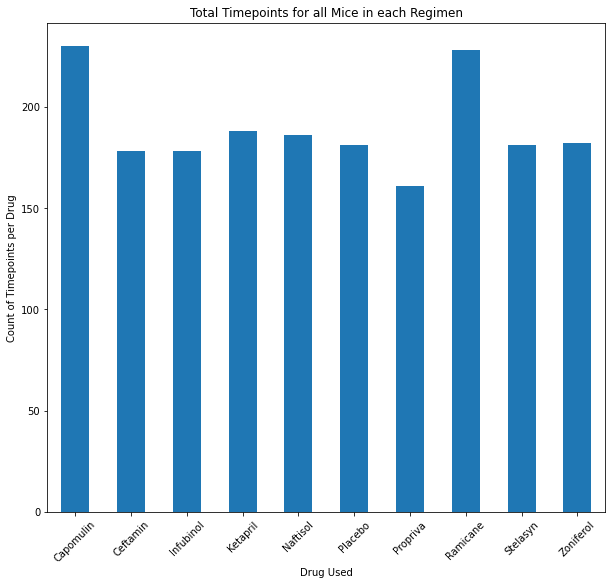

In [8]:
# pd
gbo_drugs = combined_df.groupby('drug_regimen')['mouse_id']

gbo_drugs.count().plot(
        kind='bar',
        title='Total Timepoints for all Mice in each Regimen',
        figsize=(10, 9),
        xlabel='Drug Used',
        ylabel='Count of Timepoints per Drug',
        rot=45
)

plt.savefig('gbo_drugs_pd.png')

plt.show()

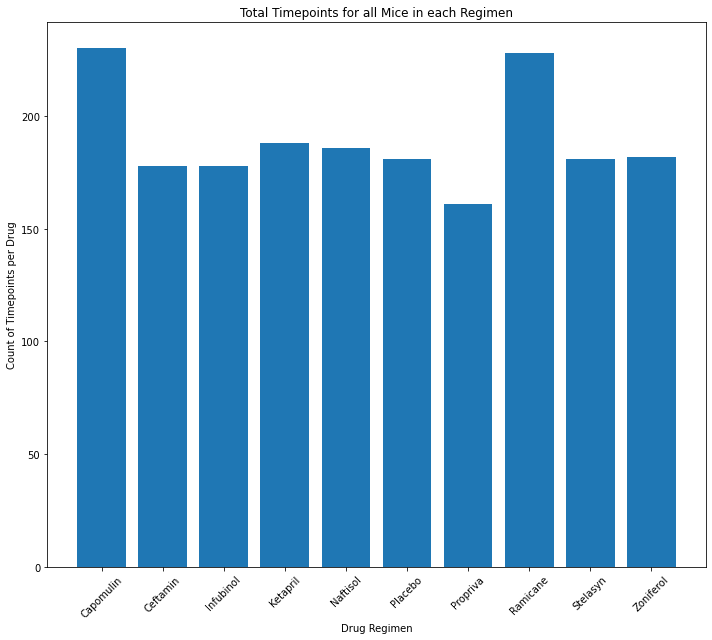

In [9]:
# plt

x, y = gbo_drugs.groups.keys(), gbo_drugs.count()

fig, ax = plt.subplots(figsize=(10, 9))

plot1 = ax.bar(
        x,
        height=y,
        label='Drug Regimen'
)

# below commented because NoTe: tHEsE pLOtS sHOulD lOOK IDeNtiCAl.
# ax.bar_label(plot1)

plt.xticks(rotation=45)

plt.xlabel('Drug Regimen')
plt.ylabel('Count of Timepoints per Drug')
plt.title('Total Timepoints for all Mice in each Regimen')

plt.tight_layout()

plt.savefig('gbo_drugs_plt.png')
plt.show()

Generate a pie plot using both Pandas's DataFrame.plot() and Matplotlib's pyplot that shows the distribution of female or male mice in the study.

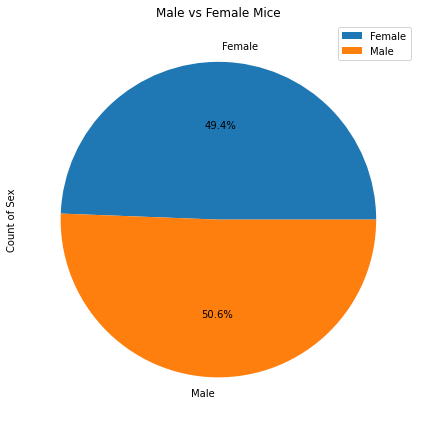

In [10]:
gbo_sex = combined_df.groupby('sex')
fig, ax = plt.subplots()

# pd
gbo_sex.count().plot(
        kind='pie',
        y='mouse_id',
        title='Male vs Female Mice',
        ax=ax,
        ylabel='Count of Sex',
        figsize=(6, 6),
        labels=['Female', 'Male'],
        autopct='%2.1f%%'
)

ax.legend(['Female', 'Male'])
plt.tight_layout()
plt.savefig('gbo_sex_pd.png')
plt.show()

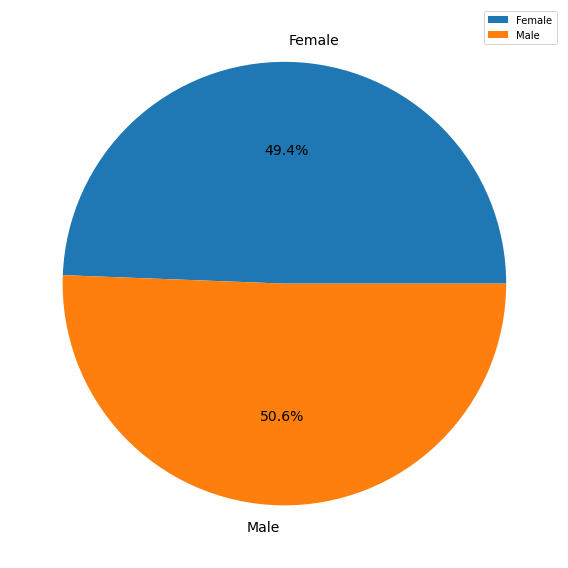

In [11]:
# plt
fig, ax = plt.subplots(figsize=(8, 8))
labels = ['Female', "Male"]

sizes = gbo_sex['sex'].count()

ax.pie(
        x=sizes,
        labels=labels,
        autopct='%3.1f%%',
        textprops={'fontsize': 14}
)

plt.legend()

plt.tight_layout()

plt.savefig('gbo_sex_plt.png')
plt.show()

Calculate the final tumor volume of each mouse across four of the most promising treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
best_drugs = 'Capomulin Ramicane Infubinol Ceftamin'.split()
best_drugs_df = combined_df[combined_df['drug_regimen'].isin(best_drugs)]

best_drugs_df['drug_regimen'].unique()
best_drugs_df.sort_values('timepoint', inplace=True)

# Start by getting the last (greatest) timepoint for each mouse
gbo_best_drugs = best_drugs_df.groupby(['drug_regimen', 'mouse_id']).last()['tumor_volume_(mm3)']

gbo_best_drugs.head(30)

C:\Users\danie\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


drug_regimen  mouse_id
Capomulin     b128        38.982878
              b742        38.939633
              f966        30.485985
              g288        37.074024
              g316        40.159220
              i557        47.685963
              i738        37.311846
              j119        38.125164
              j246        38.753265
              l509        41.483008
              l897        38.846876
              m601        28.430964
              m957        33.329098
              r157        46.539206
              r554        32.377357
              r944        41.581521
              s185        23.343598
              s710        40.728578
              t565        34.455298
              u364        31.023923
              v923        40.658124
              w150        39.952347
              w914        36.041047
              x401        28.484033
              y793        31.896238
Ceftamin      a275        62.999356
              b447        45.000000
     

In [13]:
# quartiles and iqr

mdf = pd.merge(cleaned_df, best_drugs_df)
in_mdf = mdf[mdf['drug_regimen'].isin(best_drugs)]

# tumor volume list
list_tvol = in_mdf.groupby('drug_regimen')['tumor_volume_(mm3)'].apply(list)
tvol_gbo = in_mdf.groupby('drug_regimen')

quants = tvol_gbo['tumor_volume_(mm3)'].quantile([0.25, 0.75])
quant_gbo = quants.groupby('drug_regimen')
iqrs = quant_gbo.last() - quant_gbo.first()

d = {}
dfs = {}

for drug in iqrs.index:
    lbound = quants[drug][0.25] - 1.5 * iqrs[drug]
    ubound = quants[drug][0.75] + 1.5 * iqrs[drug]

    d[drug] = [lbound, ubound]

    drug_df = in_mdf[in_mdf['drug_regimen'] == drug]
    between_df = drug_df[~drug_df['tumor_volume_(mm3)'].between(left=d[drug][0], right=d[drug][1])]
    dfs[drug] = between_df

    if len(dfs[drug]) == 0:
        # these line-continuation slashes are unnecessary in real python,
        # and i find it weird that jupyter needs them.
        output_str = f'{drug}:\n'\
                     f'Lowerbound: {round(d[drug][0], 3)}\n'\
                     f'Upperbound: {round(d[drug][1], 3)}\n'\
                     'No outliers quantitatively found.\n\n'
    else:
        output_str = f'{drug}:\n'\
                     f'Lowerbound: {round(d[drug][0], 3)}\n'\
                     f'Upperbound: {round(d[drug][1], 3)}\n\n'\
                     f'Possible Outliers:\n{dfs[drug]}\n\n'

    print(output_str)

Capomulin:
Lowerbound: 26.715
Upperbound: 55.971

Possible Outliers:
   mouse_id drug_regimen  sex  age_months  weight_(g)  timepoint  tumor_volume_(mm3)  metastatic_sites
18     s185    Capomulin    0           3          17         40           25.472143                 1
19     s185    Capomulin    0           3          17         45           23.343598                 1


Ceftamin:
Lowerbound: 32.819
Upperbound: 71.191
No outliers quantitatively found.


Infubinol:
Lowerbound: 32.309
Upperbound: 72.318
No outliers quantitatively found.


Ramicane:
Lowerbound: 24.187
Upperbound: 57.488

Possible Outliers:
  mouse_id drug_regimen  sex  age_months  weight_(g)  timepoint  tumor_volume_(mm3)  metastatic_sites
9     k403     Ramicane    1          21          16         45           22.050126                 1




Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens and highlight any potential outliers in the plot by changing their color and style.

From the [plt docs](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.boxplot.html):
- flierprops : Specifies the style of the fliers.

I only changed the color, but it says to change color and style. Color is a subset of style.

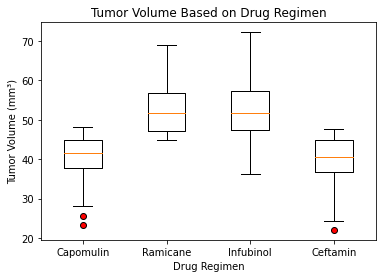

In [14]:
fig, ax = plt.subplots()

fig = ax.boxplot(
        list_tvol,
        labels=best_drugs,
        flierprops={
                'markerfacecolor': 'r'
        }
)

ax.set_title('Tumor Volume Based on Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume (mm³)')

plt.savefig('boxplot.png')
plt.show()

Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.



C:\Users\danie\AppData\Local\Temp/ipykernel_6940/2640027999.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  line_data = in_mdf[in_mdf.sort_values('mouse_id')['drug_regimen'] == 'Capomulin'][0:10]


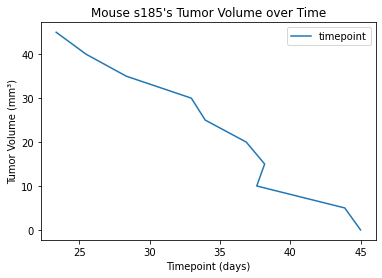

In [15]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# sort alphabetically since Capomulin will be first. Easiest to just grab the first mouse.
# that mouse has index [0:10]
line_data = in_mdf[in_mdf.sort_values('mouse_id')['drug_regimen'] == 'Capomulin'][0:10]
line_data.plot(y='timepoint', x='tumor_volume_(mm3)')

# get mouses name, but im only interested in the value and its first occurrence
plt.title(f'Mouse {line_data["mouse_id"].values[0]}\'s Tumor Volume over Time')

plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm³)')
plt.show()

Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.

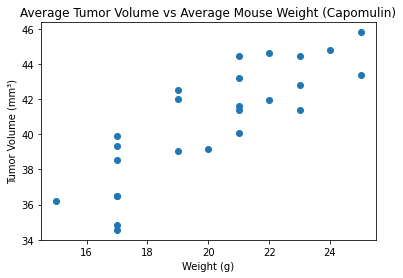

In [16]:
# tvol is tumor volume
tvol_gbo = in_mdf.groupby('drug_regimen')
capo_df = tvol_gbo.get_group('Capomulin').groupby('mouse_id').mean()

plt.scatter(
        x=capo_df['weight_(g)'],
        y=capo_df['tumor_volume_(mm3)']
)

plt.title('Average Tumor Volume vs Average Mouse Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm³)')

plt.show()

## Correlation and Regression
Calculate the correlation coefficient and linear regression model between mouse weight and average tumor volume for the Capomulin treatment. Plot the linear regression model on top of the previous scatter plot.

The correlation between mean mouse weight and mean tumor volume is 0.842.


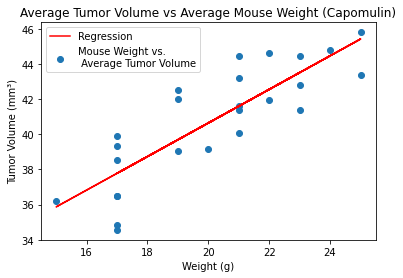

In [17]:
co = capo_df[['weight_(g)', 'tumor_volume_(mm3)']].corr()
co = co.iloc[0][1]

print(
        f'The correlation between mean mouse weight and mean tumor volume is {round(co, 3)}.'
)

reg = st.linregress(
        capo_df['weight_(g)'],
        capo_df['tumor_volume_(mm3)']
)

plt.scatter(
        x=capo_df['weight_(g)'],
        y=capo_df['tumor_volume_(mm3)'],
        label='Mouse Weight vs.\n Average Tumor Volume',
)

plt.plot(
        capo_df['weight_(g)'],
        reg[0] * capo_df['weight_(g)'] + reg[1],
        color='r',
        label='Regression'
)
plt.legend(loc=2)

plt.title('Average Tumor Volume vs Average Mouse Weight (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm³)')

plt.savefig('combined.png')

plt.show()

Look across all previously generated figures and tables and write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.

In [18]:
# just here for my curiosity
in_mdf.corr()

,sex,age_months,weight_(g),timepoint,tumor_volume_(mm3),metastatic_sites
sex,1.000000,0.067077,-0.126528,-0.000775,-0.113730,-0.078719
age_months,0.067077,1.000000,0.101805,-0.029561,0.159994,0.094027
weight_(g),-0.126528,0.101805,1.000000,-0.099032,0.712311,0.198575
timepoint,-0.000775,-0.029561,-0.099032,1.000000,0.042921,0.580503
tumor_volume_(mm3),-0.113730,0.159994,0.712311,0.042921,1.000000,0.342229
metastatic_sites,-0.078719,0.094027,0.198575,0.580503,0.342229,1.000000
